# The cooling_flow package

In [Stern et al. (2019a)](http://ui.adsabs.harvard.edu/abs/2019MNRAS.488.2549S) and [Stern et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020MNRAS.492.6042S/abstract) we demonstrated that the volume-filling gas phase in dark matter halos converges onto a one-parameter family of solutions, assuming ongoing heating by feedback is negligible. 
The cooling_flow package derives these solutions by integrating the spherical, steady-state flow equations for radiatively-cooling gas in a constant background potential. These solutions can thus be useful for:
* Estimating halo gas structure between feedback bursts or after feedback has died out at low redshift
* As a benchmark for estimating the effects of feedback on halo gas in observations and simulations
* Initial conditions for simulations of halo gas
* Other systems with similar conditions, such as the center of elliptical galaxies (e.g. Quataert & Narayan 2000). 

The package integrates two types of solutions -- transonic solutions with an outer subsonic flow and an inner supersonic flow, and a purely subsonic flow which stalls at the radius of rotational support (the 'circularization radius'). Details of the methodology, physical motivation and reasoning behind these integrations are described in the above papers. Please send any questions or suggestions to sternjon@tauex.tau.ac.il

_Jonathan Stern_

## A. Installation
* Download using `git clone https://jonathanstern@bitbucket.org/jonathanstern/cooling_flow.git`
* After cloning, you can interactively walk through this Python notebook (e.g. `jupyter-lab example.ipynb`)
* Required libraries: numpy, scipy, astropy

## B. Integration

In [216]:
import sys
from astropy import units as un, constants as cons
import numpy as np

In [217]:
sys.path.append('../pysrc/') #assuming notebook run from ipynb/ directory 
import solve_ode as CF
# import importlib
# importlib.reload(SO)
# importlib.reload(Halo)
# importlib.reload(Cool)

#### 1. define potential

In [218]:
# any class which inherits CF.Potential and implements the base class methods can be used as a potential
# several examples are implemented in the module HaloPotential
# this example initializes the potential to a power-law with v_c = 200*(r/R_vir)^-0.2
import HaloPotential as Halo
potential = Halo.PowerLaw(m=-0.1,vc_Rvir=150*un.km/un.s,Rvir=200*un.kpc)

#### 2. define cooling function

In [219]:
# any class which inherits CF.Cooling and implements the base class methods can be used as cooling function
# WiersmaCooling tables are implemented in the module WiersmaCooling (requires h5py)
import WiersmaCooling as Cool
Z2Zsun = 1/3.
z = 0.
cooling = Cool.Wiersma_Cooling(Z2Zsun,z)

/mnt/home/btan1/Work/CGM_ICs/ipynb/../pysrc/WiersmaCooling.py:53: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


#### 3a. integrate transonic solution

In [220]:
max_step = 0.1                         #lowest resolution of solution in ln(r)
R_min    = 0.1*un.kpc                  #inner radius of supersonic part of solution
R_max    = 10.*potential.Rvir          #outer radius of integration
R_sonics  = np.array([1.,30.])*un.kpc  #sonic radii
transsonic_solutions = []
for R_sonic in R_sonics:
    print('\nR_sonic = %s'%R_sonic)
    transsonic_solutions.append(CF.shoot_from_R_sonic(potential,
                                                      cooling,
                                                      R_sonic,
                                                      R_max,
                                                      R_min,
                                                      max_step=max_step,
                                                      return_all_results=False,
                                                      verbose=True))


R_sonic = 1.0 kpc
Integrating with v_c^2/c_s^2 (R_sonic) = 1.000010 ... Stop reason: Unbound (Maximum r = 3 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.500005 ... Stop reason: No transsonic solutions
Integrating with v_c^2/c_s^2 (R_sonic) = 1.250008 ... Stop reason: Unbound (Maximum r = 12 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.375006 ... Stop reason: Unbound (Maximum r = 88 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.437506 ... Stop reason: No transsonic solutions
Integrating with v_c^2/c_s^2 (R_sonic) = 1.406256 ... Stop reason: No transsonic solutions
Integrating with v_c^2/c_s^2 (R_sonic) = 1.390631 ... Stop reason: Sonic point (Maximum r = 58 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.382819 ... Stop reason: Unbound (Maximum r = 150 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.386725 ... Stop reason: Unbound (Maximum r = 300 kpc)
Integrating with v_c^2/c_s^2 (R_sonic) = 1.388678 ... Stop reason: Sonic point (Maximum r = 1159 kpc)
Integrating with v_c^2/c_

#### 3b. integrate solution which stalls at circularization radius

In [202]:
max_step = 0.1                             #lowest resolution of solution in ln(r)
R_circ   = 0.05 * potential.Rvir           #circularization radius
R_max    = 10.  * potential.Rvir           #outer radius of integration
Mdots  = np.array([1.,50.])*un.Msun/un.yr  # mass inflow rates
stalled_solutions = []
for Mdot in Mdots:
    print('\nMdot = %s'%Mdot)
    stalled_solutions.append(CF.shoot_from_R_circ(potential,
                                                  cooling,
                                                  R_circ,
                                                  Mdot,
                                                  R_max,
                                                  max_step=max_step,
                                                  verbose=True))


Mdot = 1.0 solMass / yr
Integrating with log T(R_circ) = 4.50 ... Stop reason: Sonic point (Maximum r = 49 kpc)
Integrating with log T(R_circ) = 4.75 ... Stop reason: Unbound (Maximum r = 175 kpc)
Integrating with log T(R_circ) = 4.62 ... Stop reason: Sonic point (Maximum r = 226 kpc)
Integrating with log T(R_circ) = 4.69 ... Stop reason: Unbound (Maximum r = 449 kpc)
Integrating with log T(R_circ) = 4.66 ... Stop reason: Sonic point (Maximum r = 875 kpc)
Integrating with log T(R_circ) = 4.67 ... Stop reason: Max R reached (Maximum r = 1999 kpc)

Mdot = 50.0 solMass / yr
Integrating with log T(R_circ) = 4.50 ... Stop reason: Unbound (Maximum r = 25 kpc)
Integrating with log T(R_circ) = 4.25 ... Stop reason: Unbound (Maximum r = 53 kpc)
Integrating with log T(R_circ) = 4.12 ... Stop reason: Unbound (Maximum r = 149 kpc)
Integrating with log T(R_circ) = 4.06 ... Stop reason: Sonic point (Maximum r = 12 kpc)
Integrating with log T(R_circ) = 4.09 ... Stop reason: Sonic point (Maximum r = 

## C. Plotting

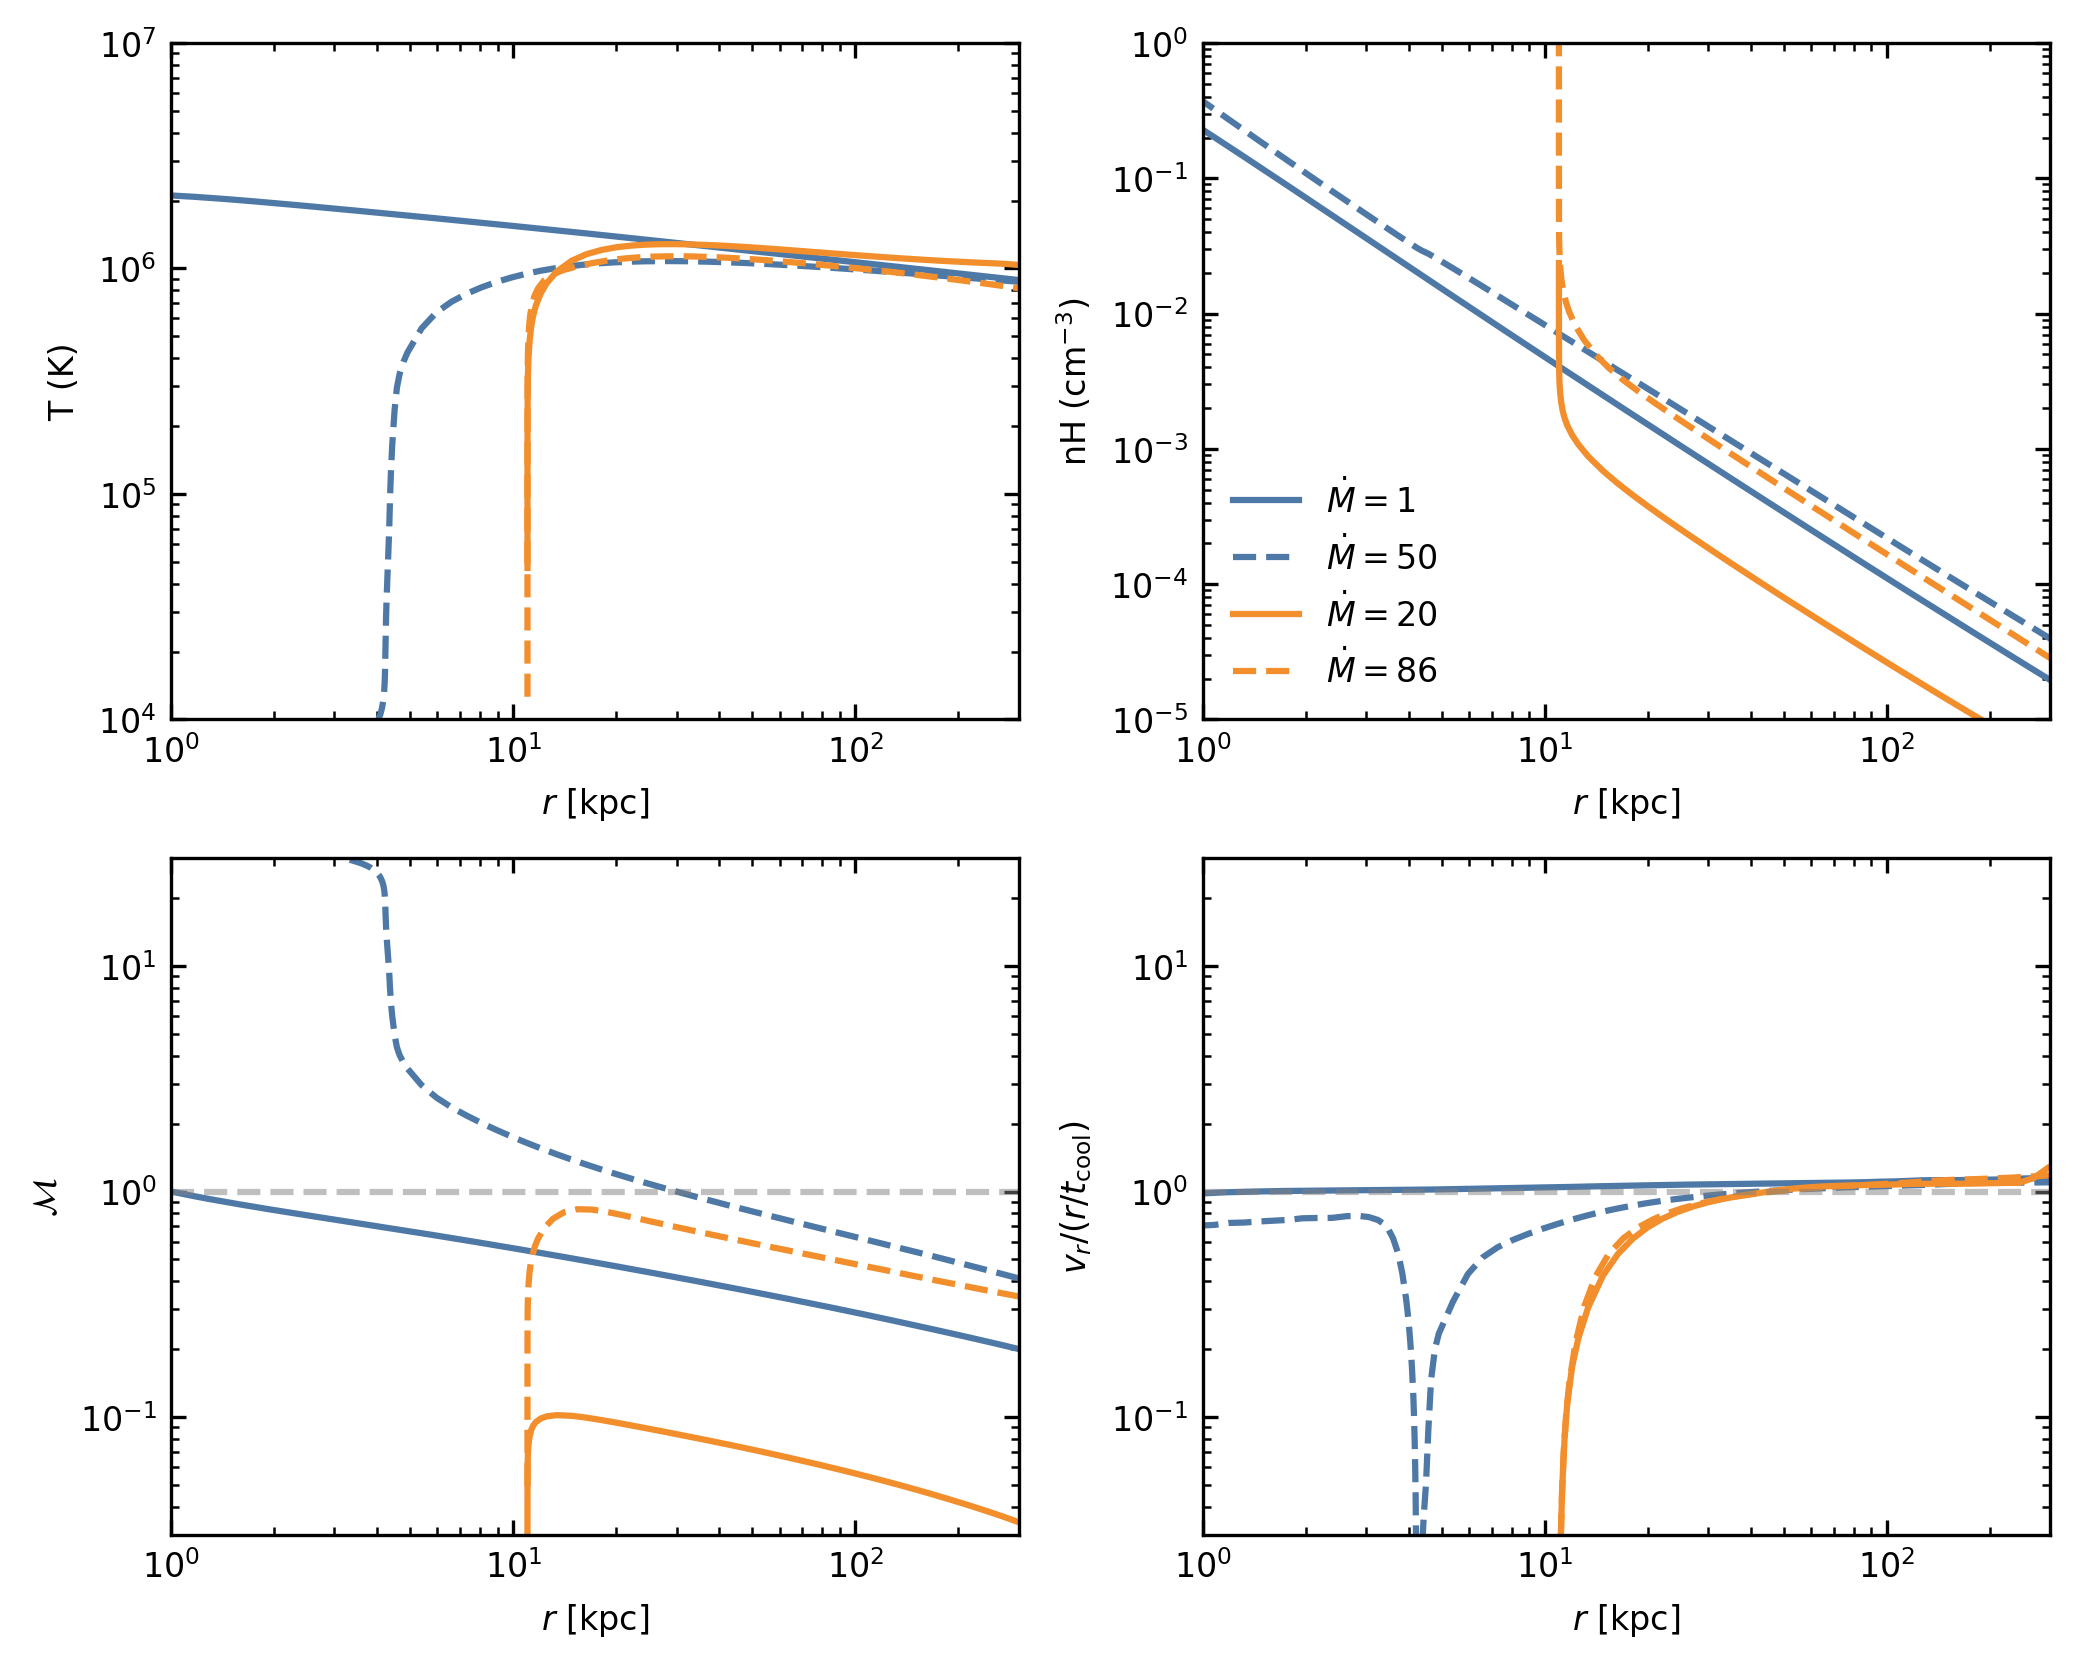

In [215]:
from latexify import latexify
from matplotlib import pyplot as plt

res1 = transsonic_solutions[0]
res2 = transsonic_solutions[1]
res3 = stalled_solutions[0]
res4 = stalled_solutions[1]

latexify(columns=2)
fig, axs = plt.subplots(2, 2)

for ax in axs.flatten():
    ax.set_xlabel(r'$r$ [kpc]')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(top=True, right=True, which="both", direction='in')
    ax.set_xlim(1,300)

axs[0, 0].plot(res1.Rs, res1.Ts, c='C0', ls='-')
axs[0, 0].plot(res2.Rs, res2.Ts, c='C0', ls='--')
axs[0, 0].plot(res3.Rs, res3.Ts, c='C1', ls='-')
axs[0, 0].plot(res4.Rs, res4.Ts, c='C1', ls='--')
axs[0, 0].set_ylabel(r'T (K)')
axs[0, 0].set_ylim(1e4,1e7)

axs[0, 1].plot(res1.Rs, res1.nHs, c='C0', ls='-', label=r'$\dot{M} = 1$')
axs[0, 1].plot(res2.Rs, res2.nHs, c='C0', ls='--',label=r'$\dot{M} = 50$')
axs[0, 1].plot(res3.Rs, res3.nHs, c='C1', ls='-', label=r'$\dot{M} = 20$')
axs[0, 1].plot(res4.Rs, res4.nHs, c='C1', ls='--',label=r'$\dot{M} = 86$')
axs[0, 1].set_ylabel(r'nH (cm$^{-3}$)')
axs[0, 1].set_ylim(1e-5,1)
axs[0, 1].legend(frameon=False, loc='lower left')

axs[1, 0].plot(res1.Rs, res1.Ms, c='C0', ls='-')
axs[1, 0].plot(res2.Rs, res2.Ms, c='C0', ls='--')
axs[1, 0].plot(res3.Rs, res3.Ms, c='C1', ls='-')
axs[1, 0].plot(res4.Rs, res4.Ms, c='C1', ls='--')
axs[1, 0].set_ylabel(r'$\mathcal{M}$')
axs[1, 0].set_ylim(0.03,30)
axs[1, 0].axhline(1.,c='.5',ls='--',alpha=0.5)

axs[1, 1].plot(res1.Rs, res1.t_cools / res1.t_flows, c='C0', ls='-')
axs[1, 1].plot(res2.Rs, res2.t_cools / res2.t_flows, c='C0', ls='--')
axs[1, 1].plot(res3.Rs, res3.t_cools / res3.t_flows, c='C1', ls='-')
axs[1, 1].plot(res4.Rs, res4.t_cools / res4.t_flows, c='C1', ls='--')
axs[1, 1].set_ylabel(r'$v_r / (r/t_{\rm cool})$')
axs[1, 1].set_ylim(0.03,30)
axs[1, 1].axhline(1.,c='.5',ls='--',alpha=0.5)

fig.tight_layout()
plt.show()
